In [2]:
import pymupdf  # imports the pymupdf library

doc = pymupdf.open("pdfs/sample.pdf")  # open a document.
page = doc[22]
xx = page.get_links()  # get the contents of page 22
xx

[{'kind': 4,
  'xref': 7743,
  'from': Rect(653.5130004882812, 100.0670166015625, 713.2960205078125, 110.697021484375),
  'page': '266',
  'view': 'Fit',
  'id': ''},
 {'kind': 4,
  'xref': 7744,
  'from': Rect(713.2960205078125, 100.0670166015625, 743.18701171875, 110.697021484375),
  'page': '187',
  'view': 'Fit',
  'id': ''},
 {'kind': 4,
  'xref': 7745,
  'from': Rect(623.6220092773438, 100.0670166015625, 653.5130004882812, 110.697021484375),
  'page': '23',
  'view': 'Fit',
  'id': ''},
 {'kind': 4,
  'xref': 7746,
  'from': Rect(653.5130004882812, 122.7440185546875, 713.2960205078125, 133.3740234375),
  'page': '206',
  'view': 'Fit',
  'id': ''},
 {'kind': 4,
  'xref': 7747,
  'from': Rect(713.2960205078125, 122.7440185546875, 743.18701171875, 133.3740234375),
  'page': '187',
  'view': 'Fit',
  'id': ''},
 {'kind': 4,
  'xref': 7748,
  'from': Rect(623.6220092773438, 122.7440185546875, 653.5130004882812, 133.3740234375),
  'page': '23',
  'view': 'Fit',
  'id': ''},
 {'kind': 

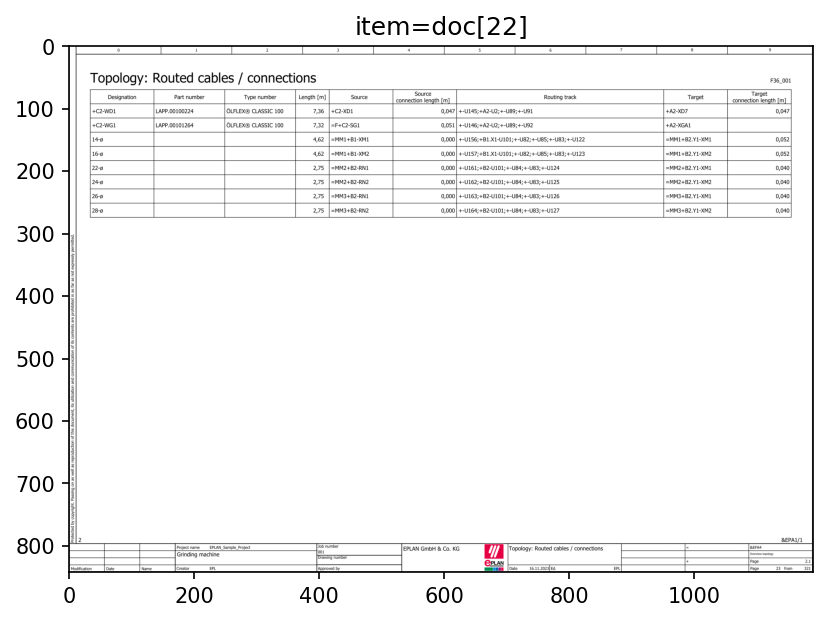

In [3]:
def show_image(item, title=""):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: any PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and using matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution
    import numpy as np
    import matplotlib.pyplot as plt

    # %matplotlib inline
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set title of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))


show_image(page, "item=doc[22]")

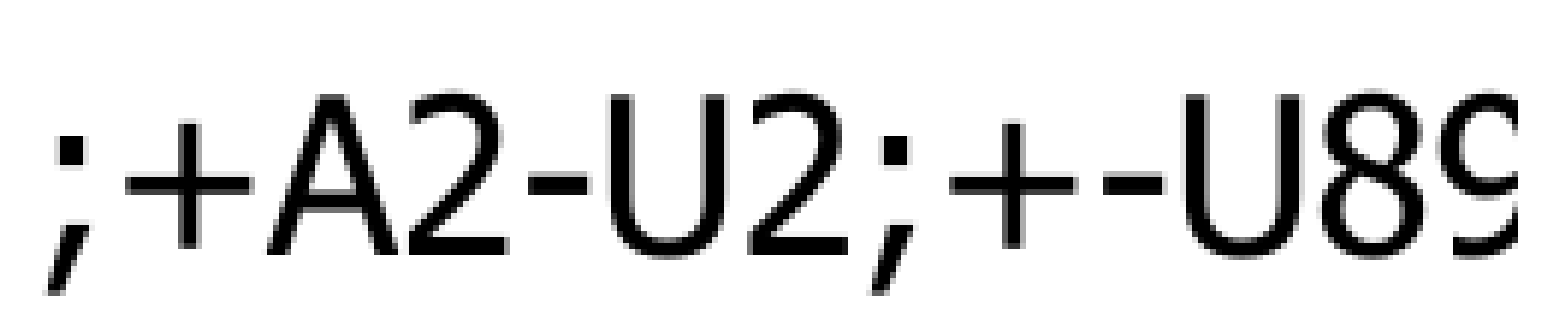

Link: 266, Text: ;+A2-U2;+-U89


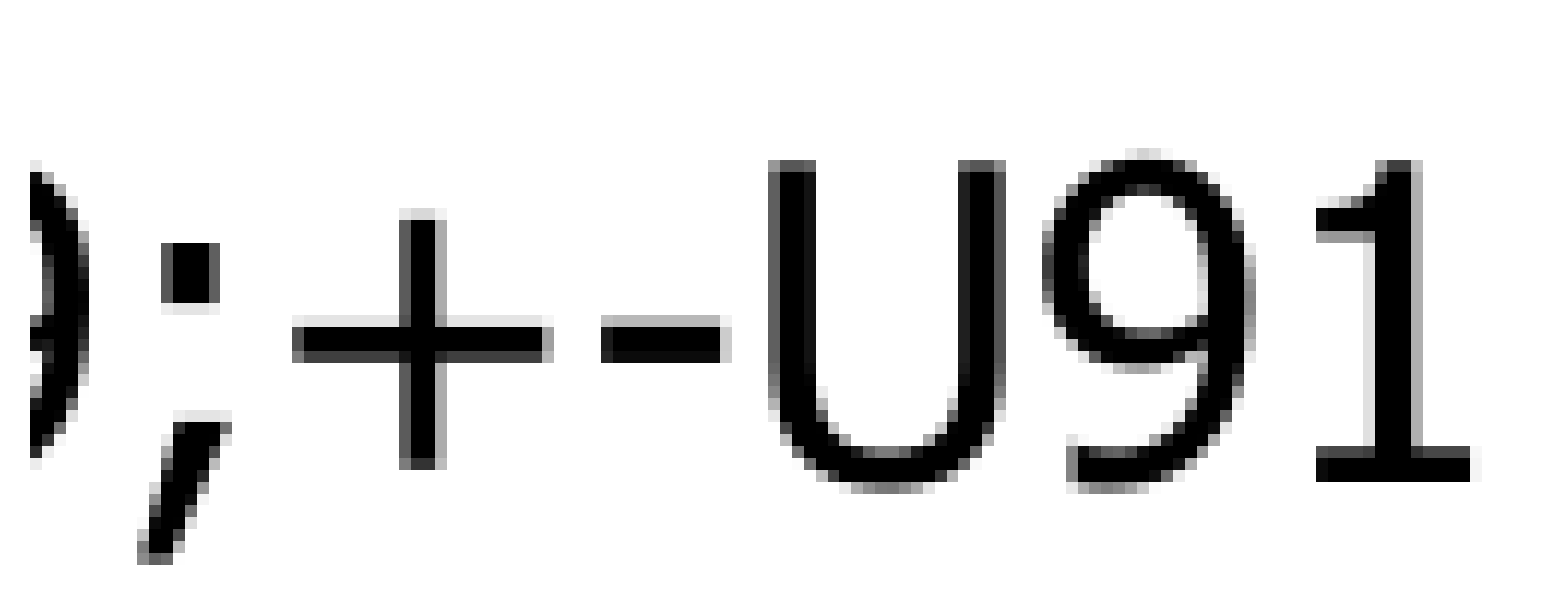

Link: 187, Text: 9;+-U91


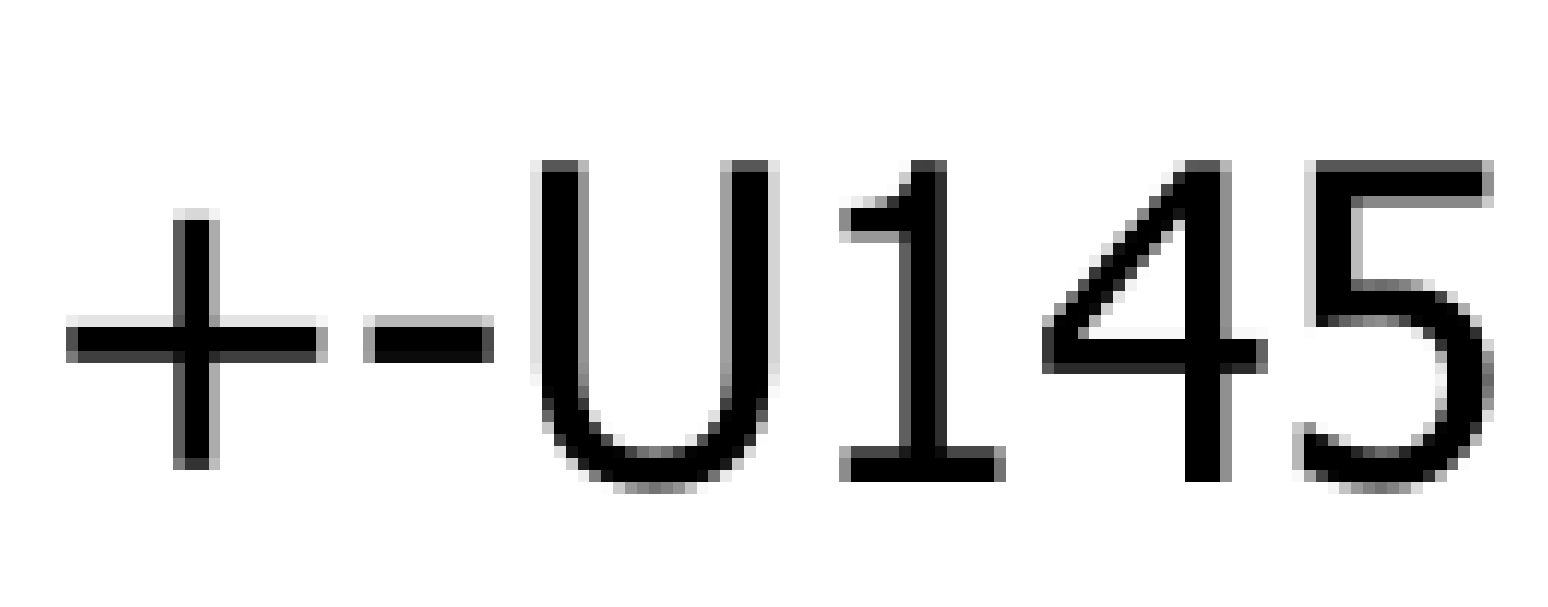

Link: 23, Text: +-U145;


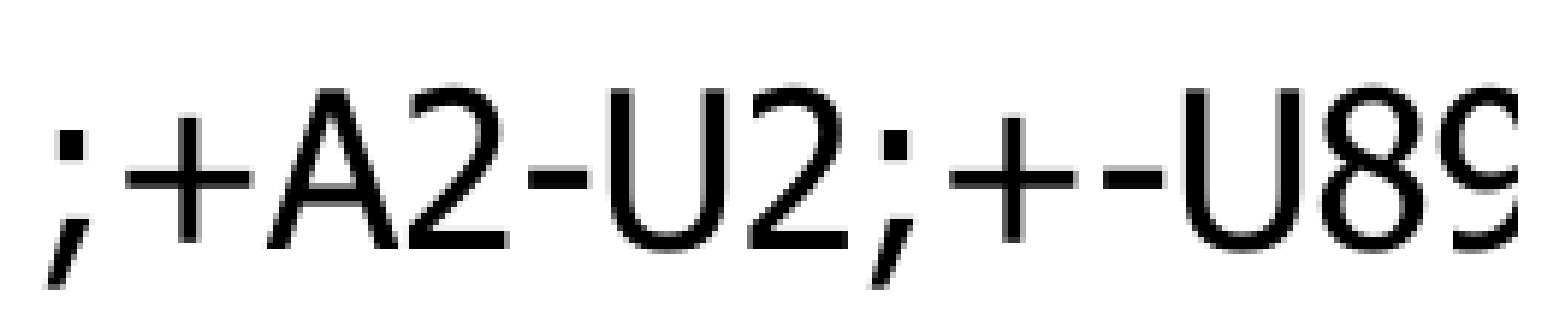

Link: 206, Text: ;+A2-U2;+-U89


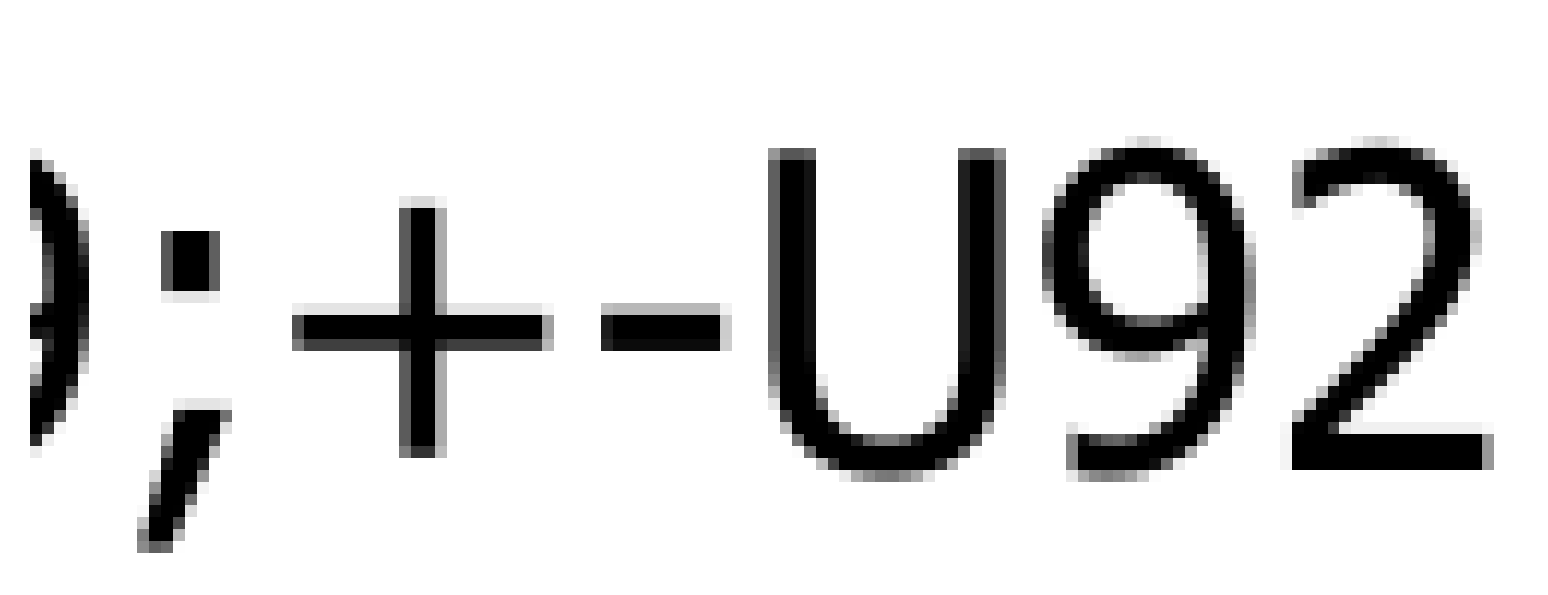

Link: 187, Text: 9;+-U92


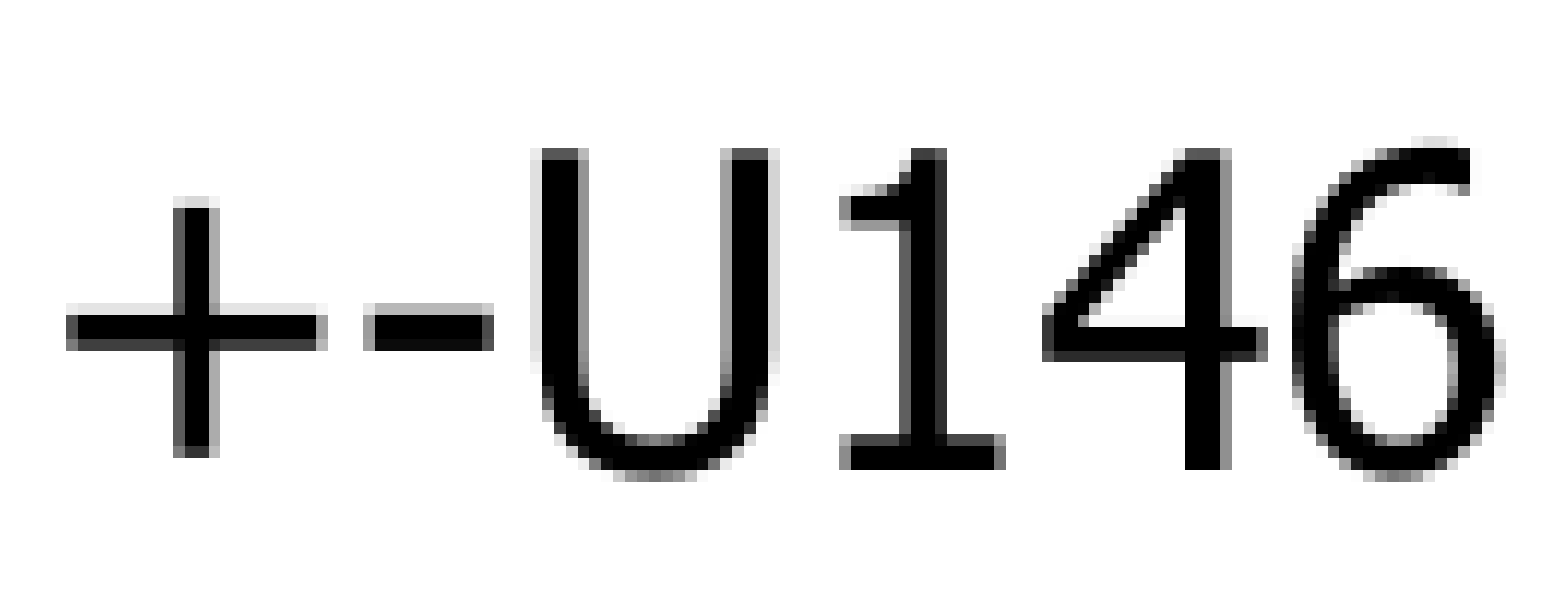

Link: 23, Text: +-U146;


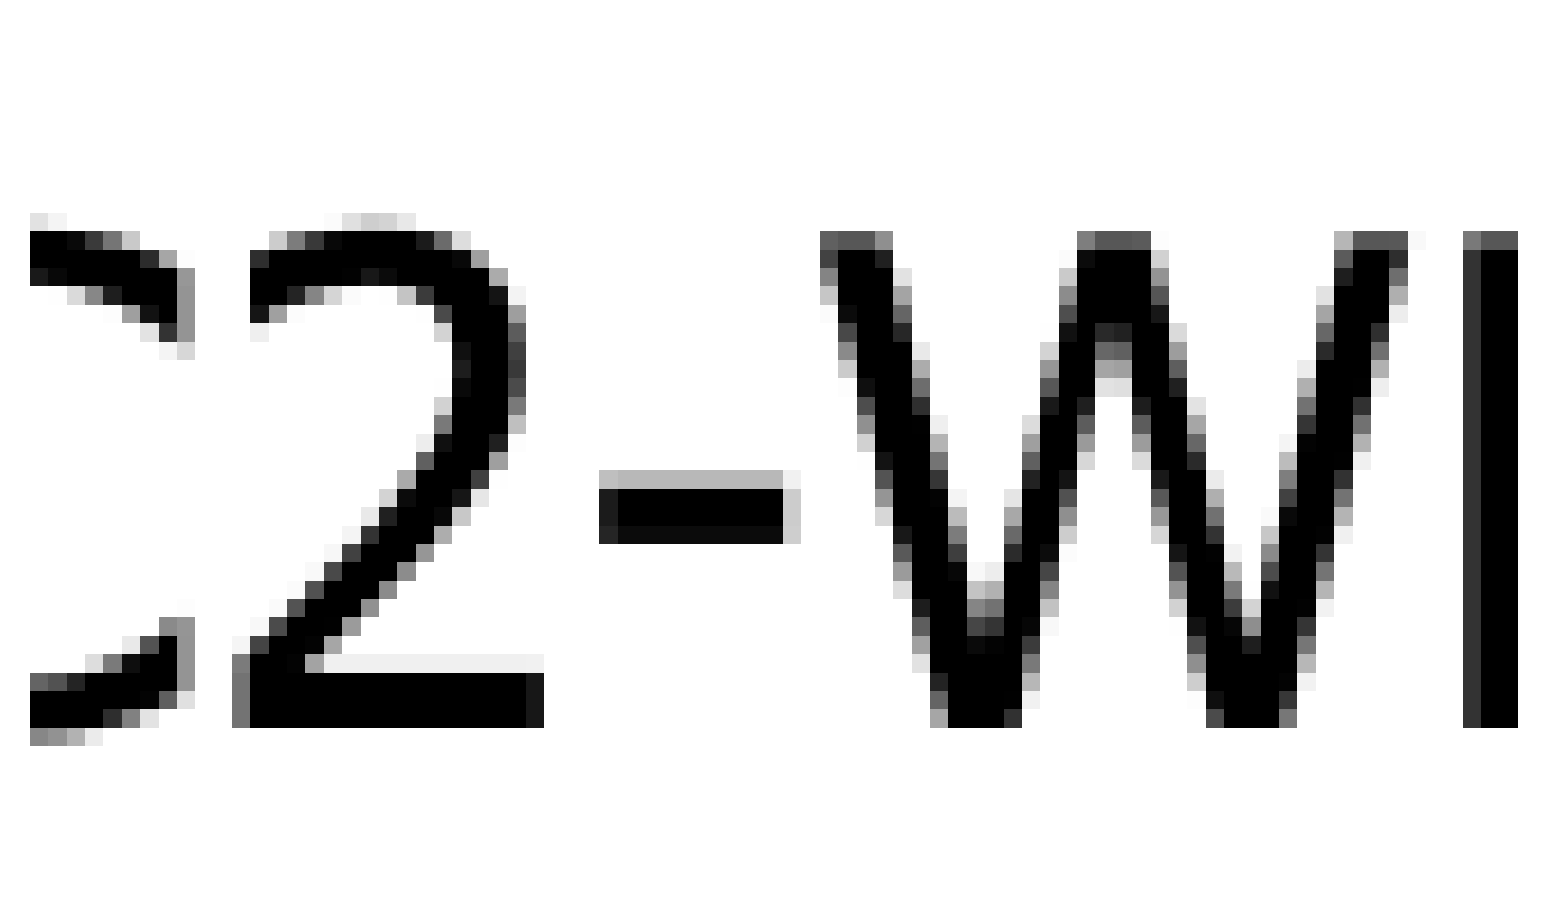

Link: 266, Text: C2-WD


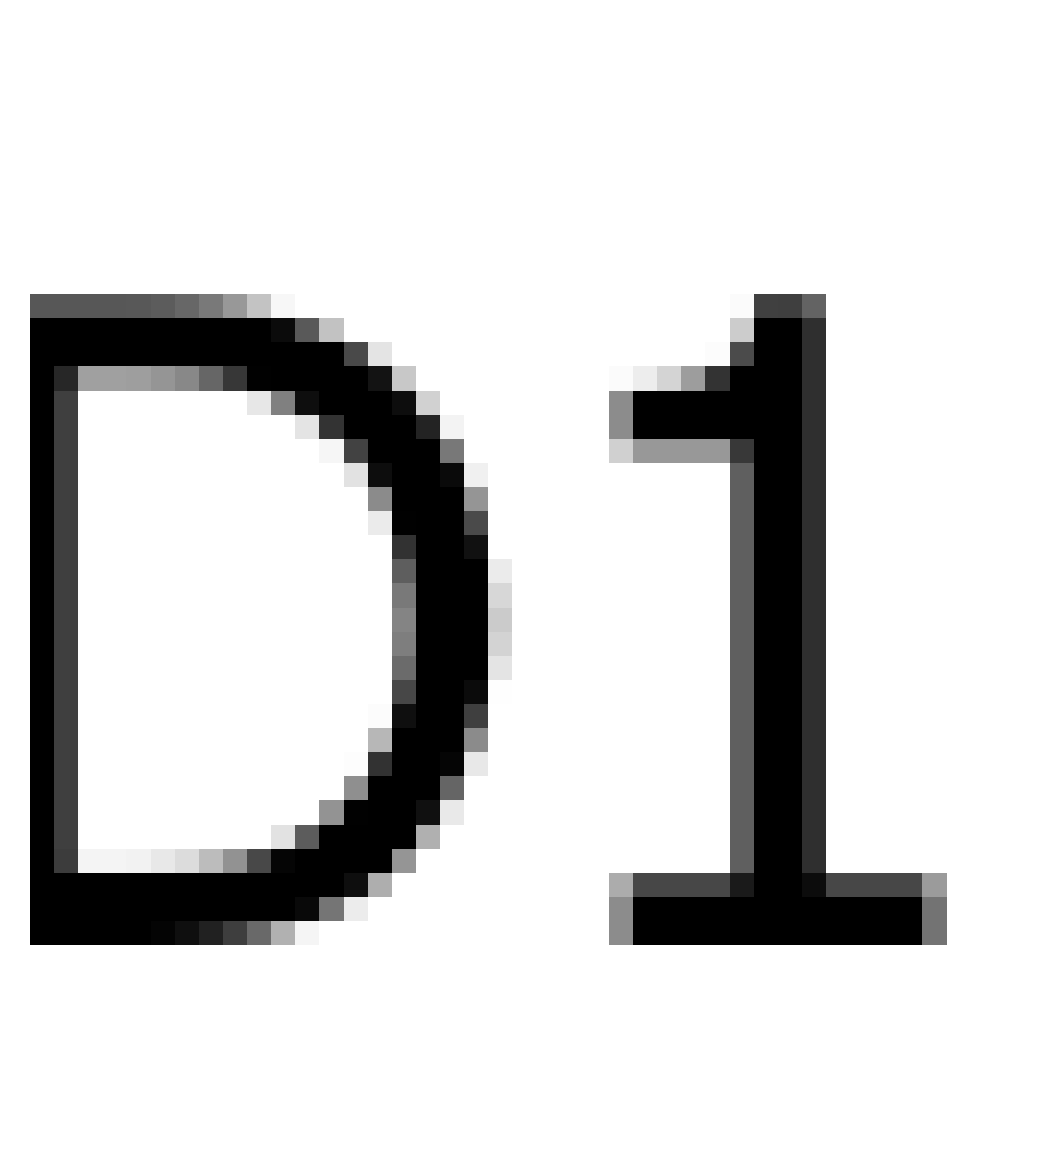

Link: 187, Text: D1


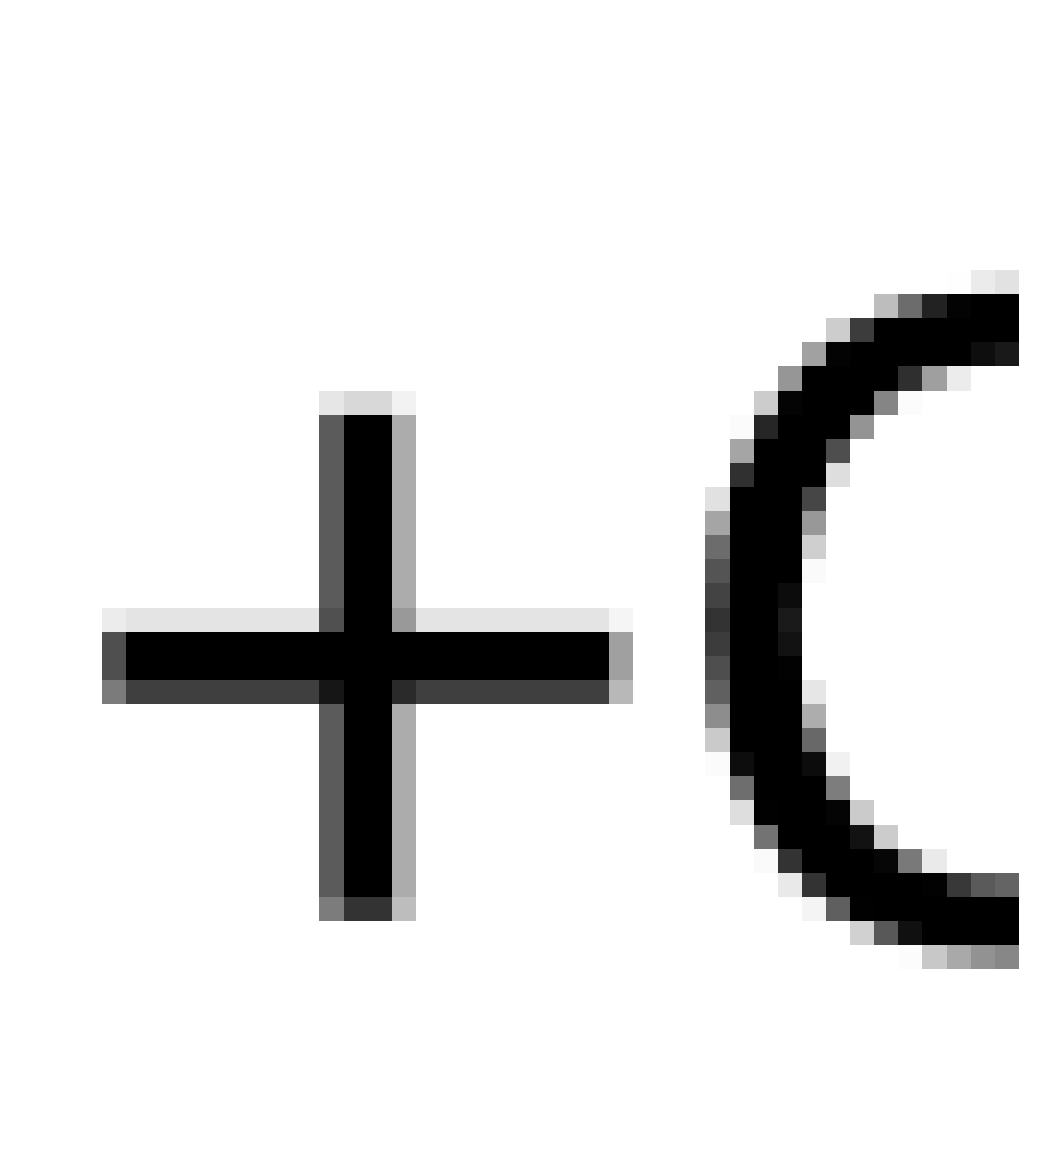

Link: 21, Text: +C


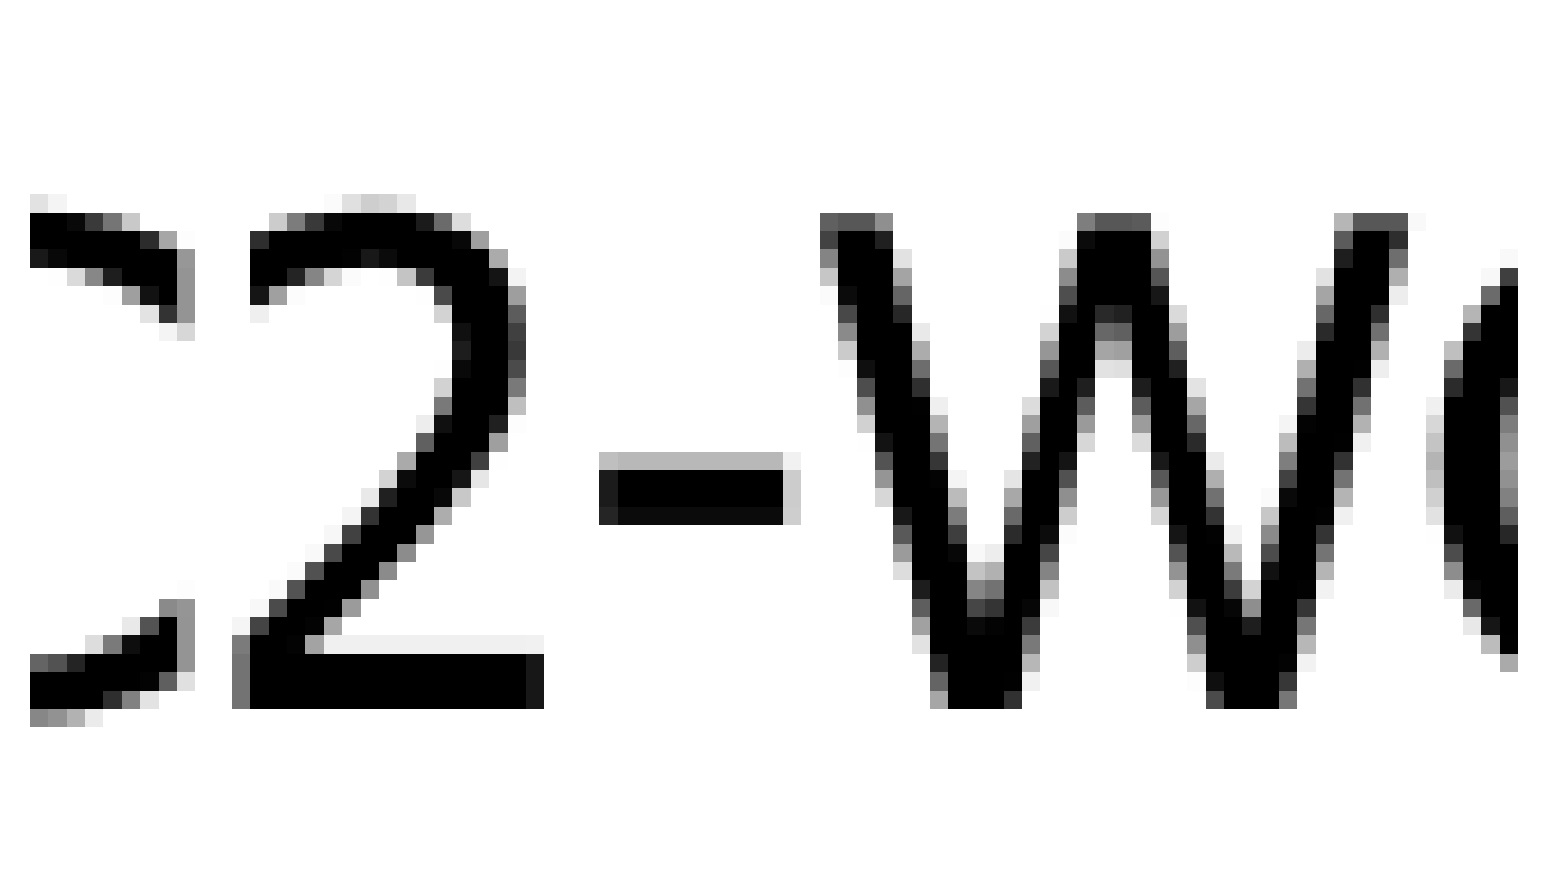

Link: 206, Text: C2-WG


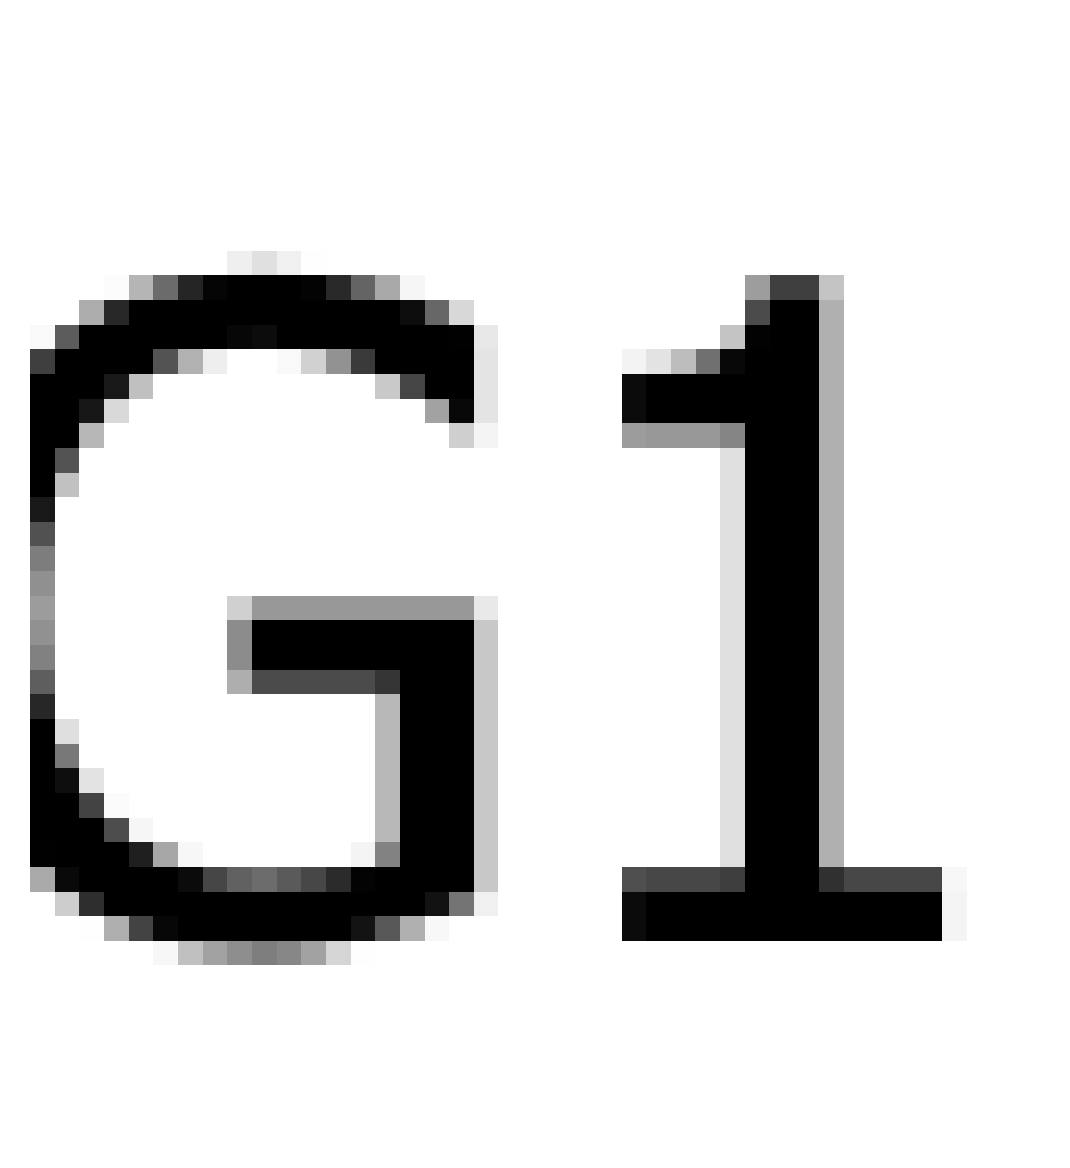

Link: 187, Text: G1


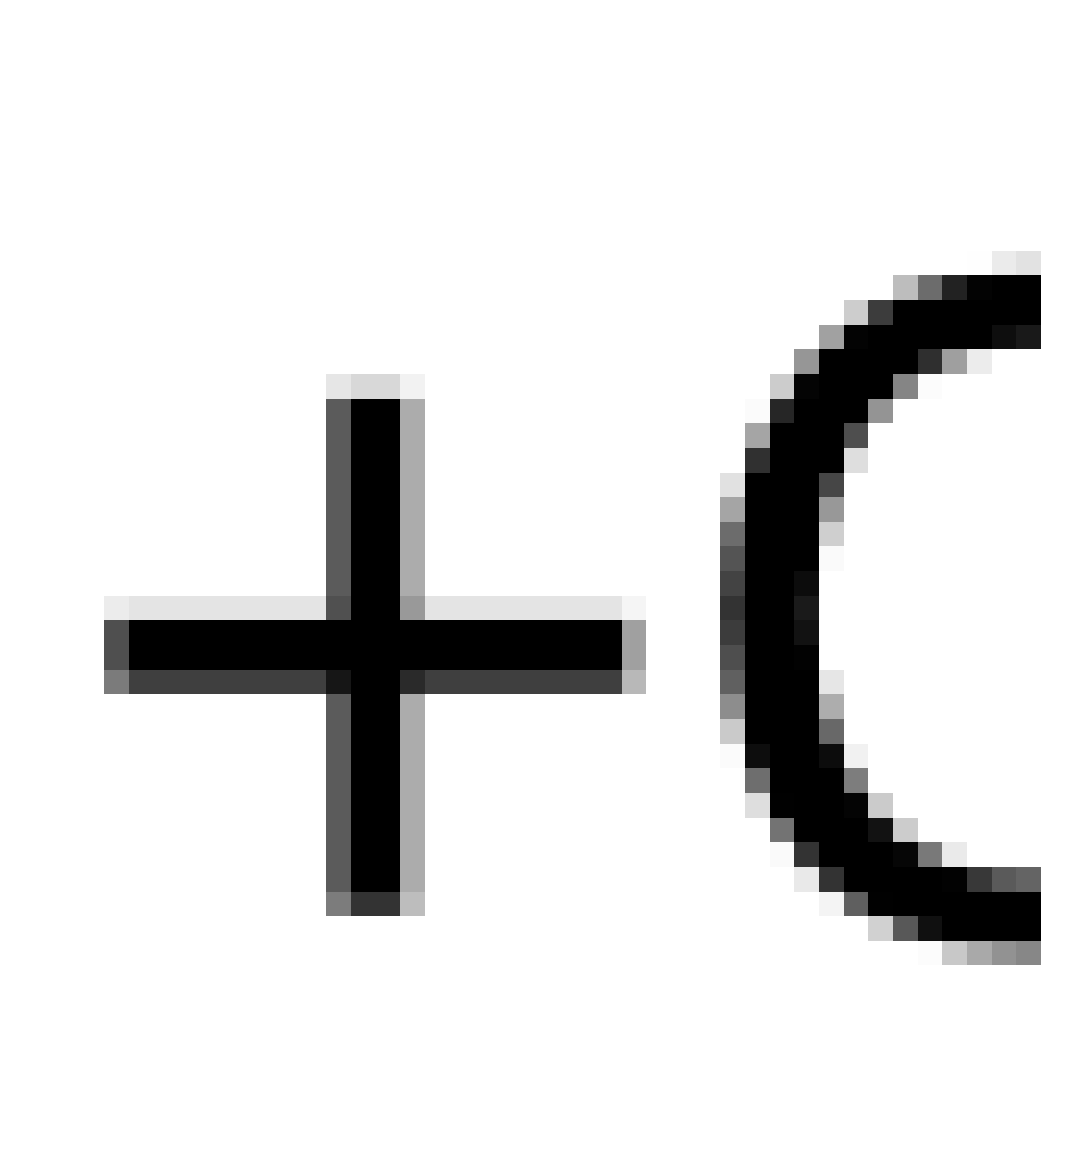

Link: 21, Text: +C


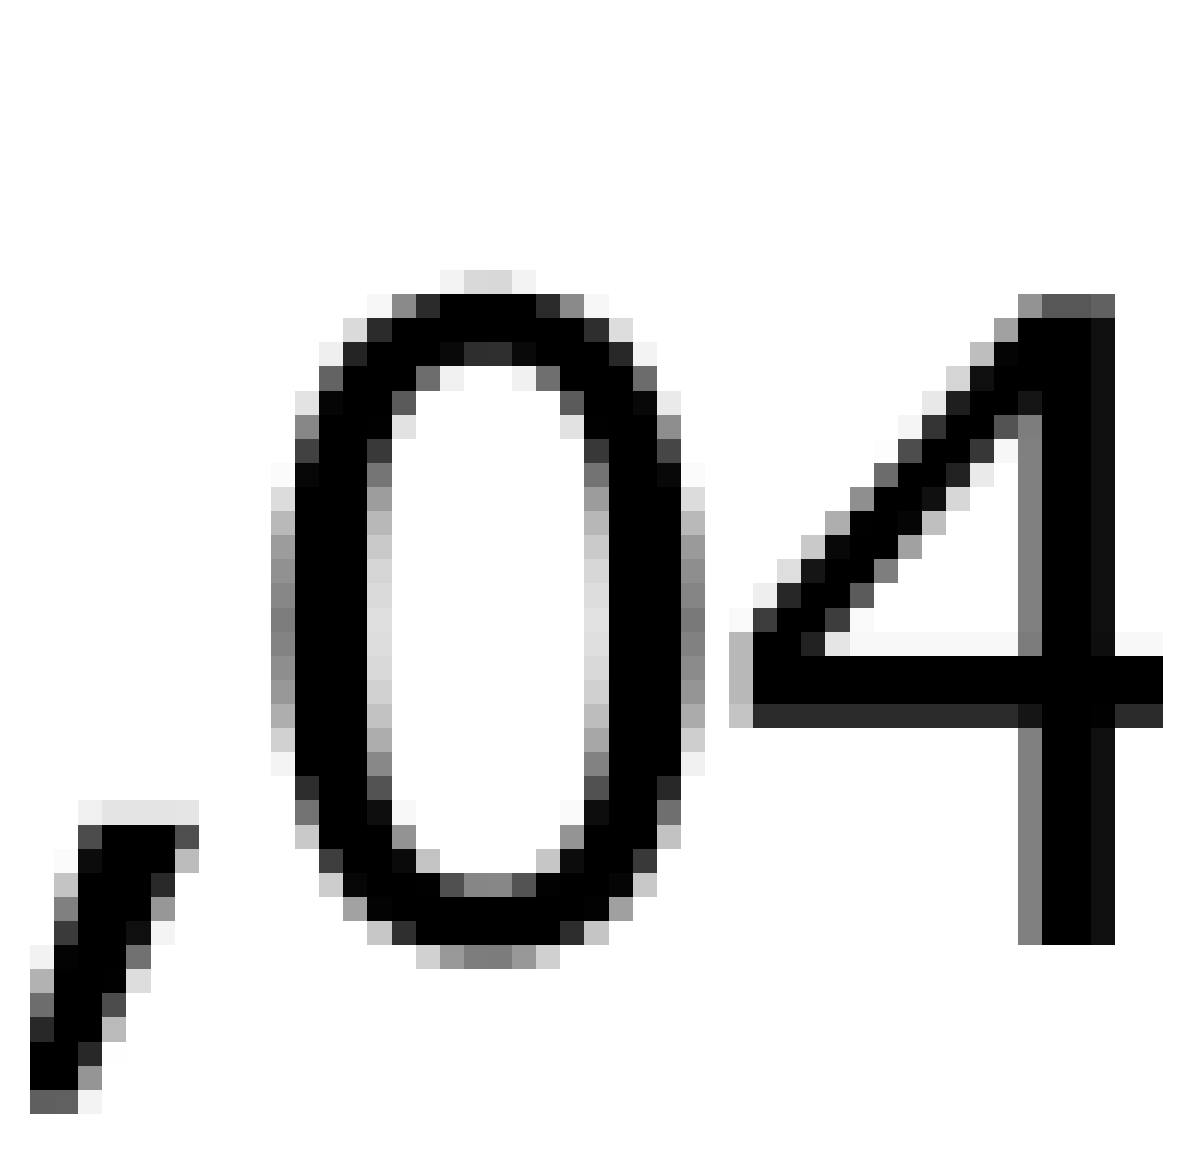

Link: 266, Text: ,04


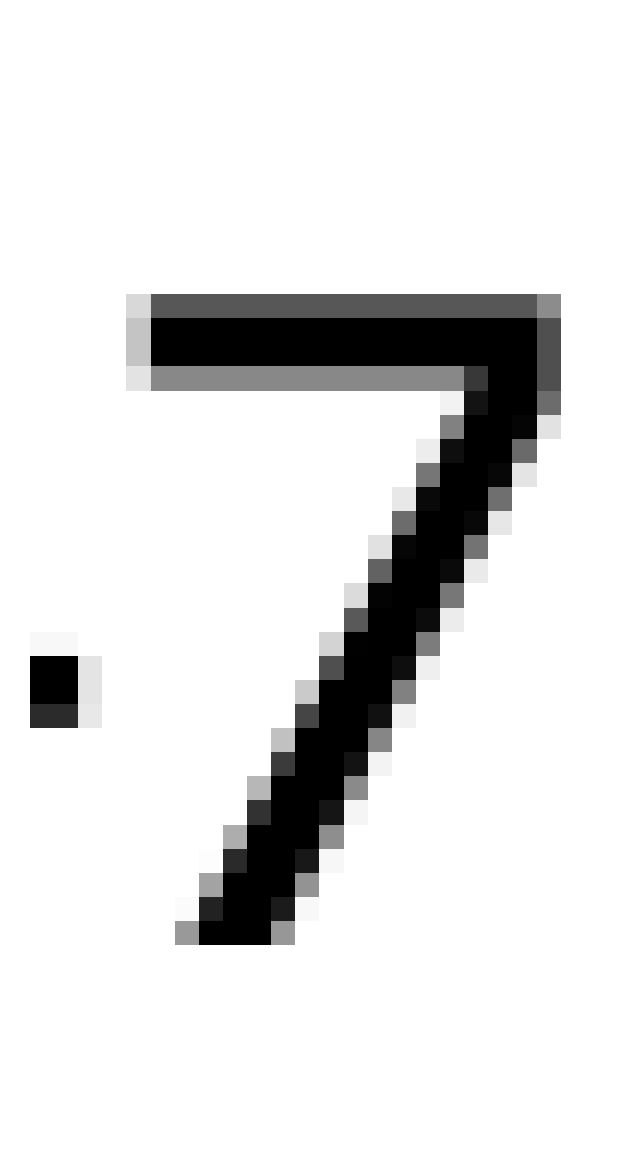

Link: 187, Text: 47


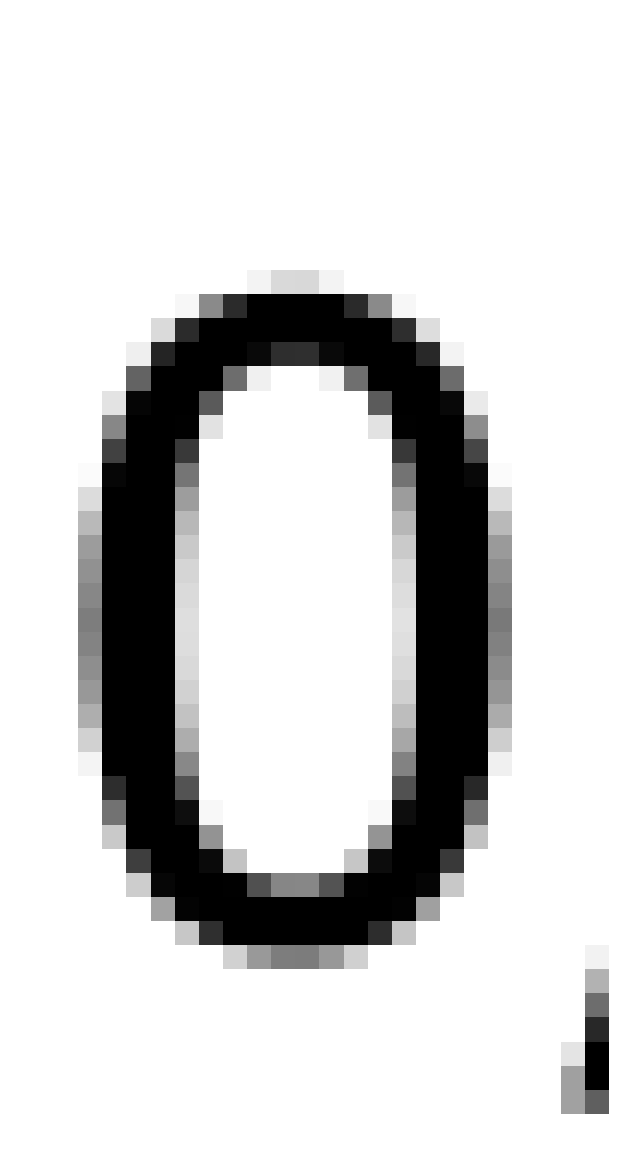

Link: 23, Text: 0,


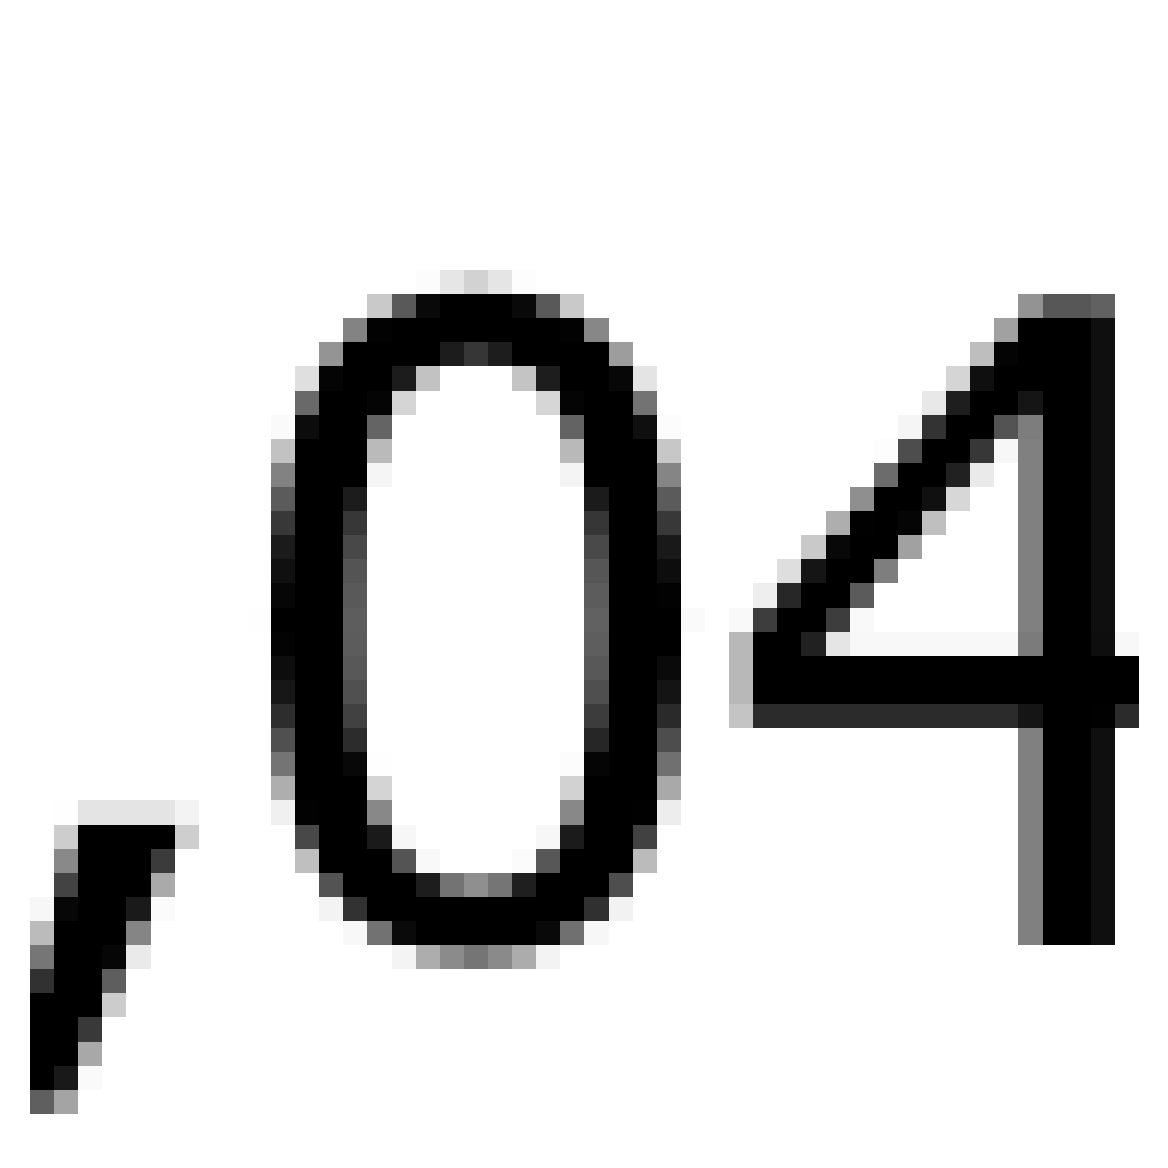

Link: 266, Text: ,04


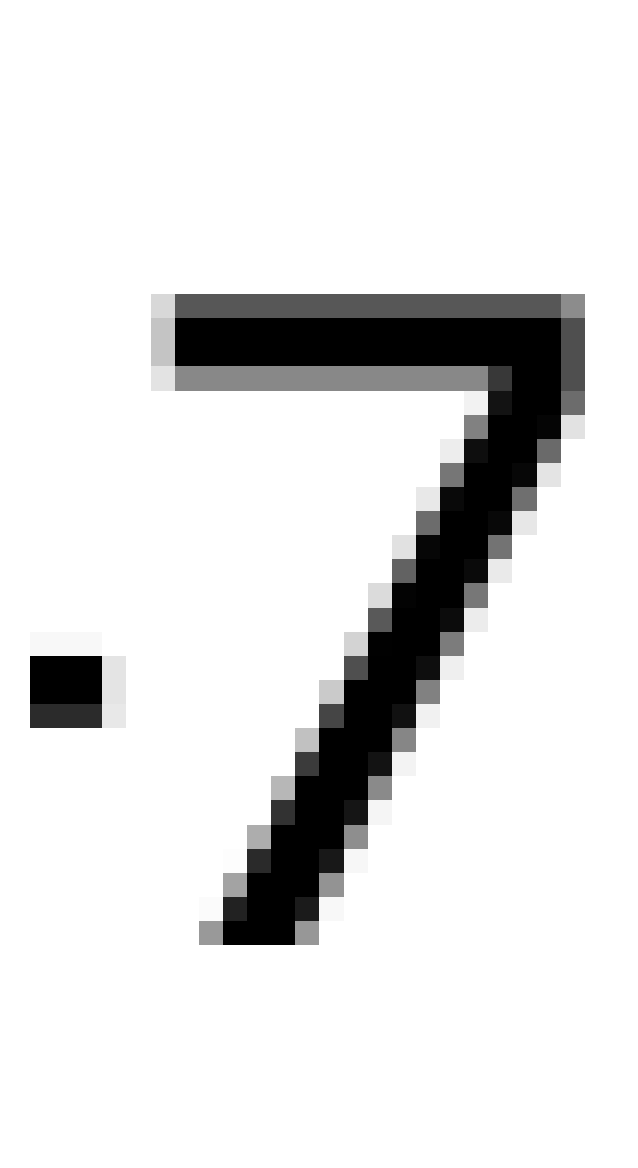

Link: 187, Text: 47


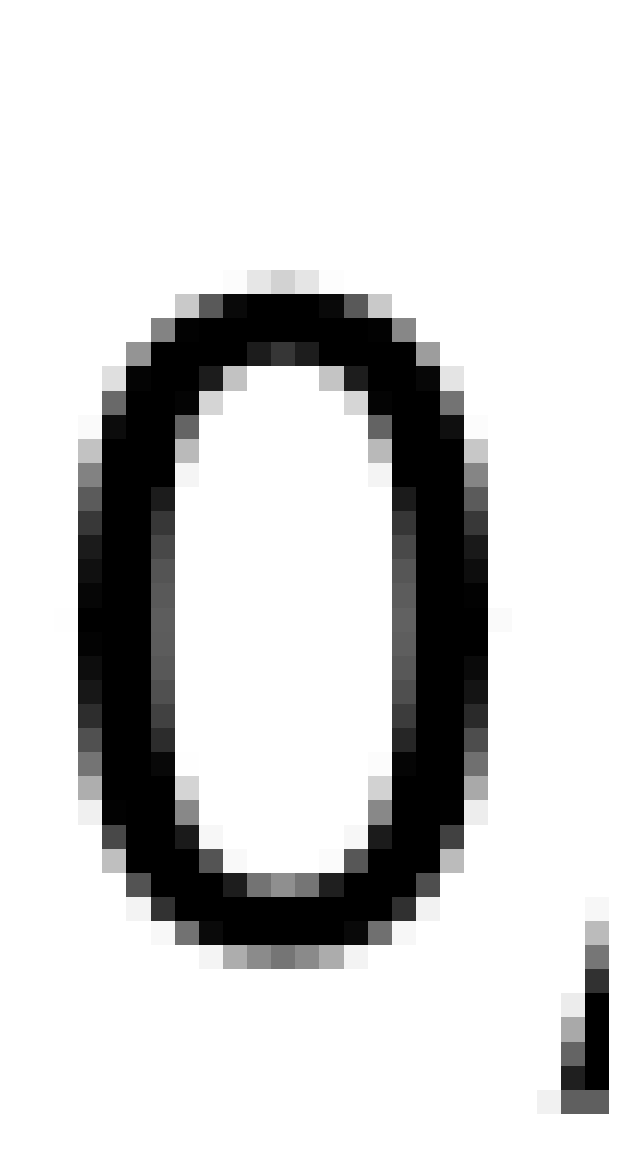

Link: 23, Text: 0,


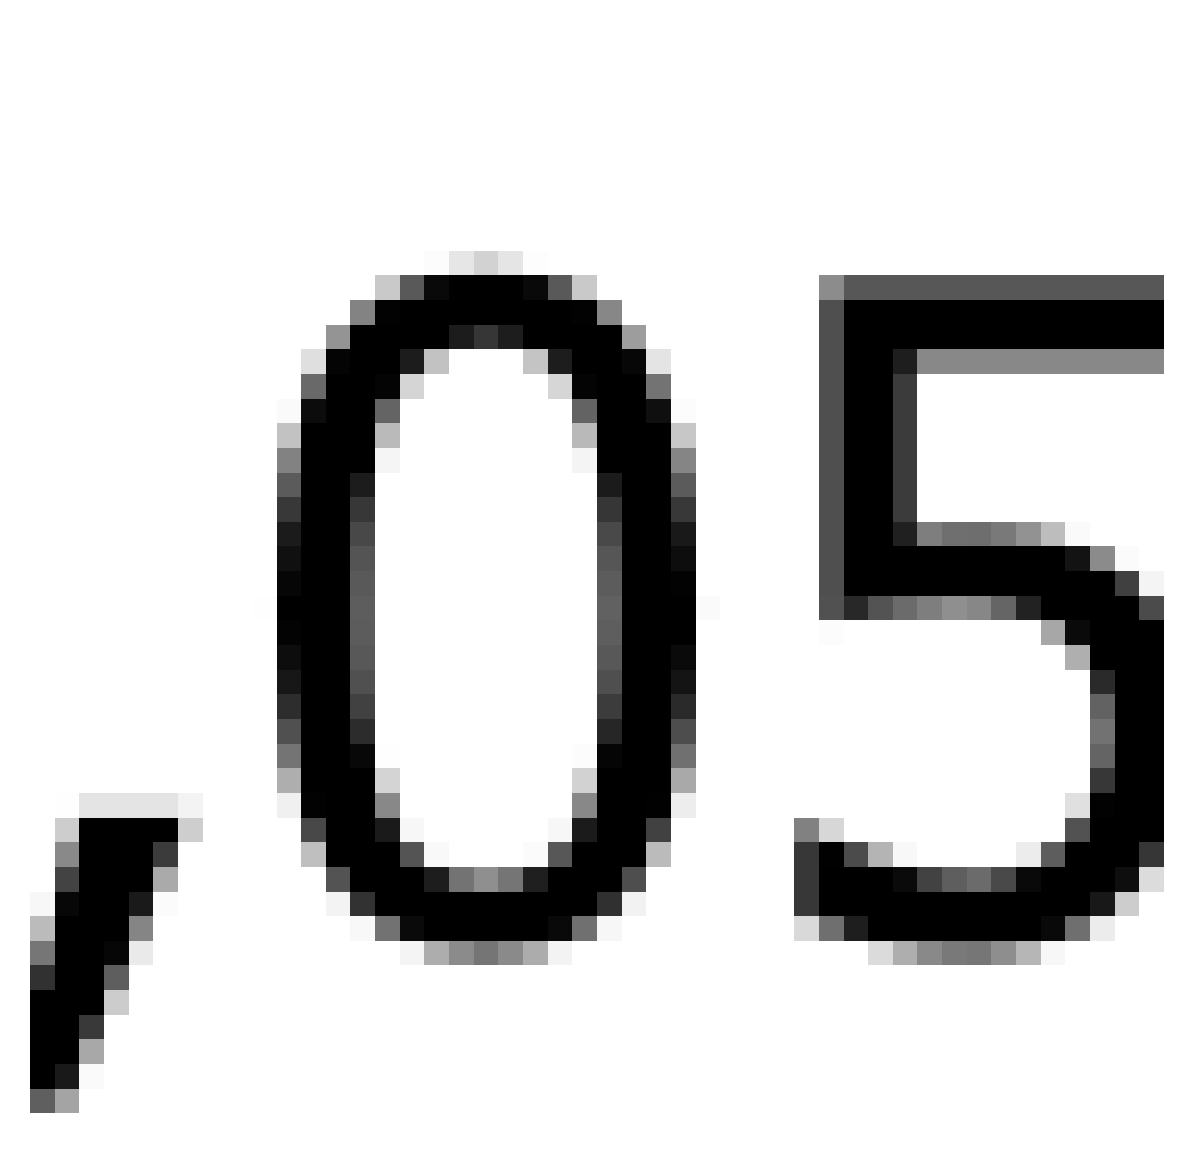

Link: 206, Text: ,05


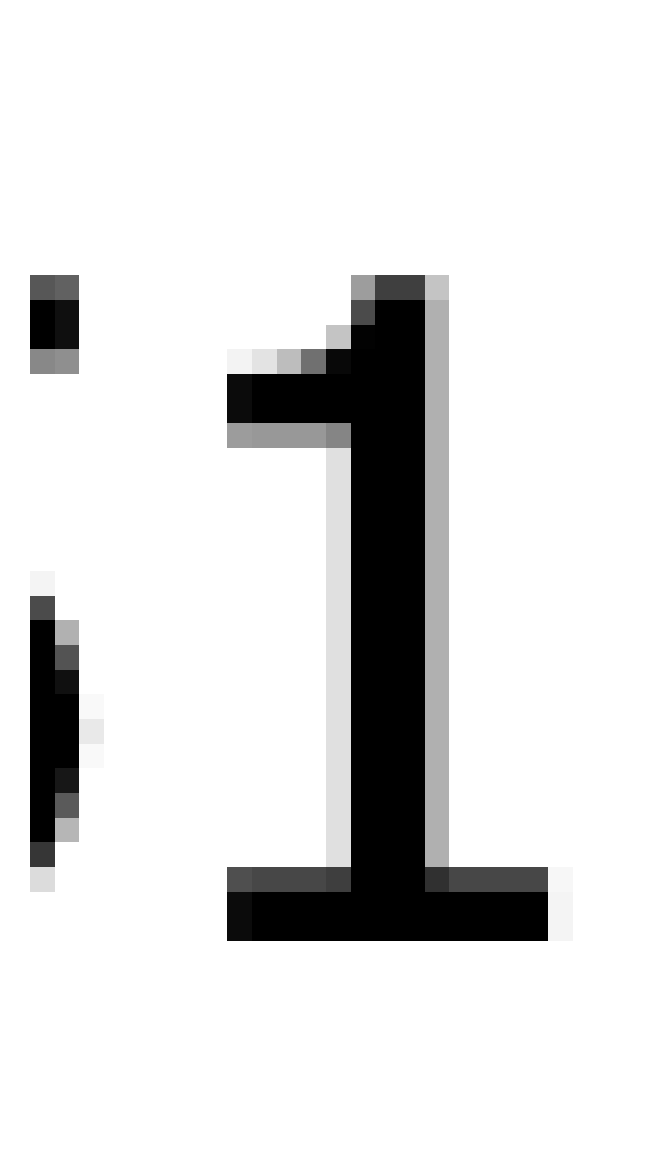

Link: 187, Text: 51


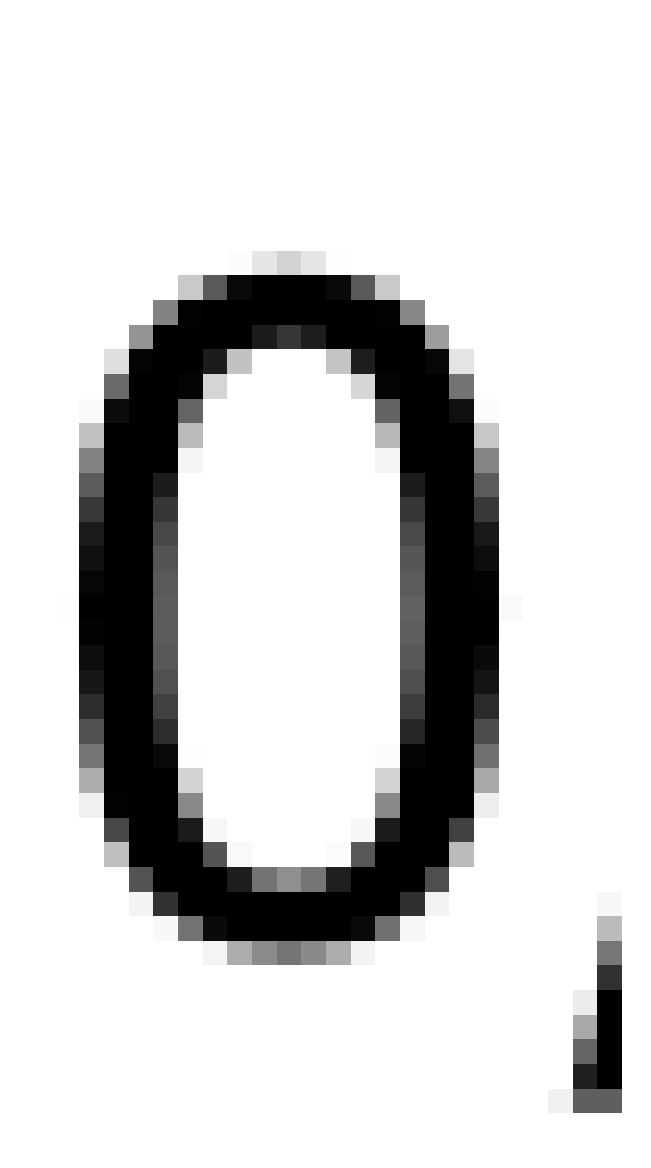

Link: 23, Text: 0,


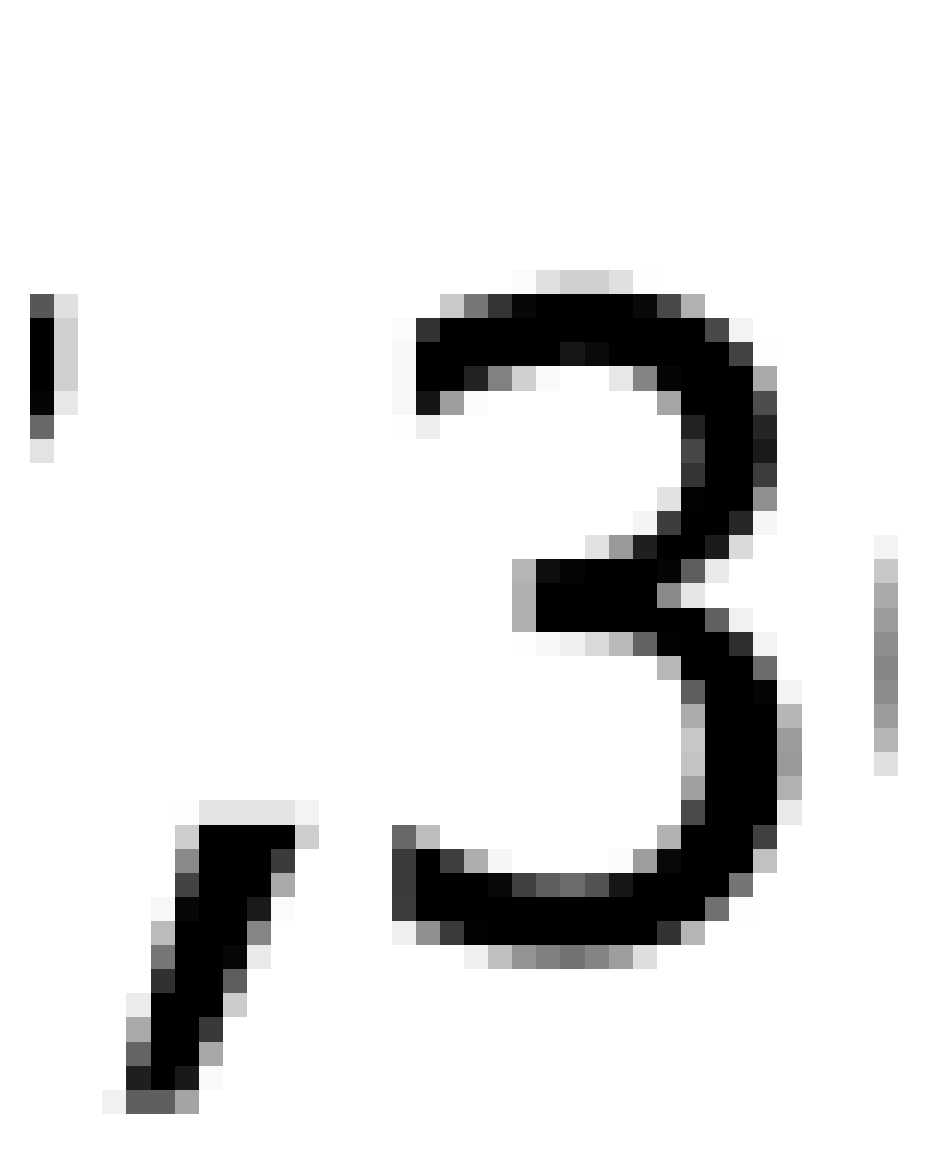

Link: 266, Text: 7,36


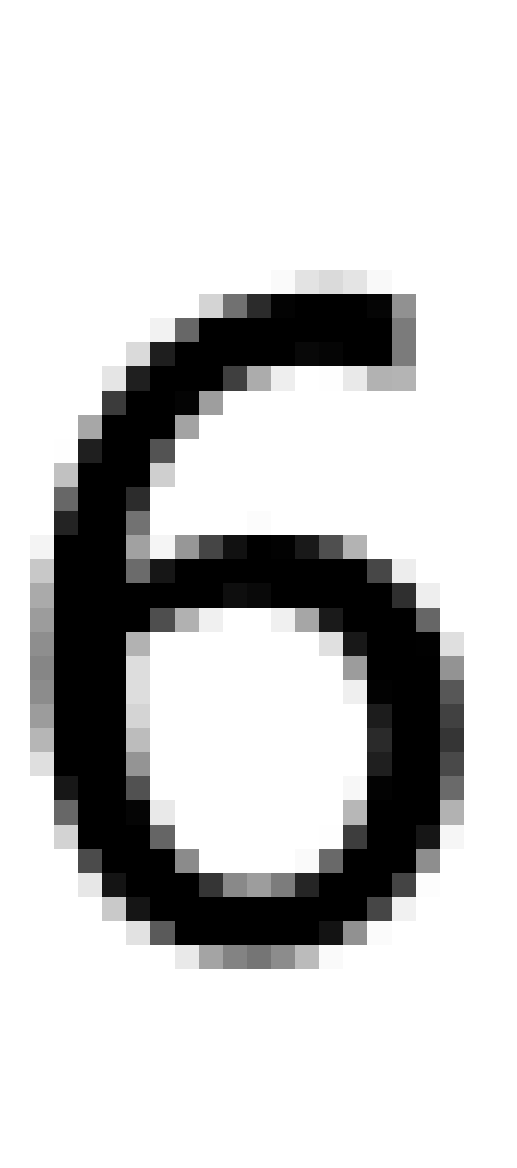

Link: 187, Text: 6


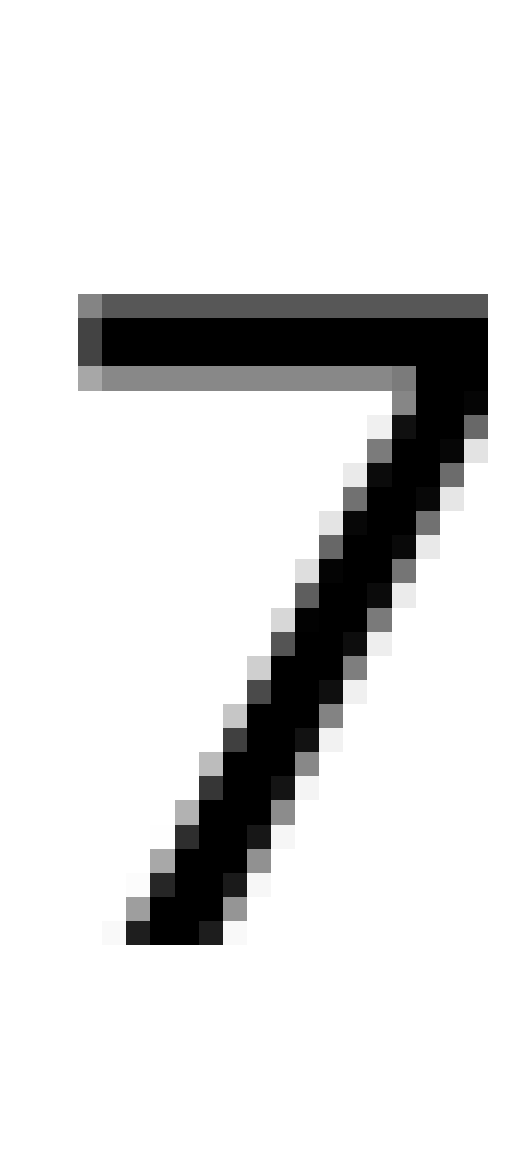

Link: 23, Text: 7


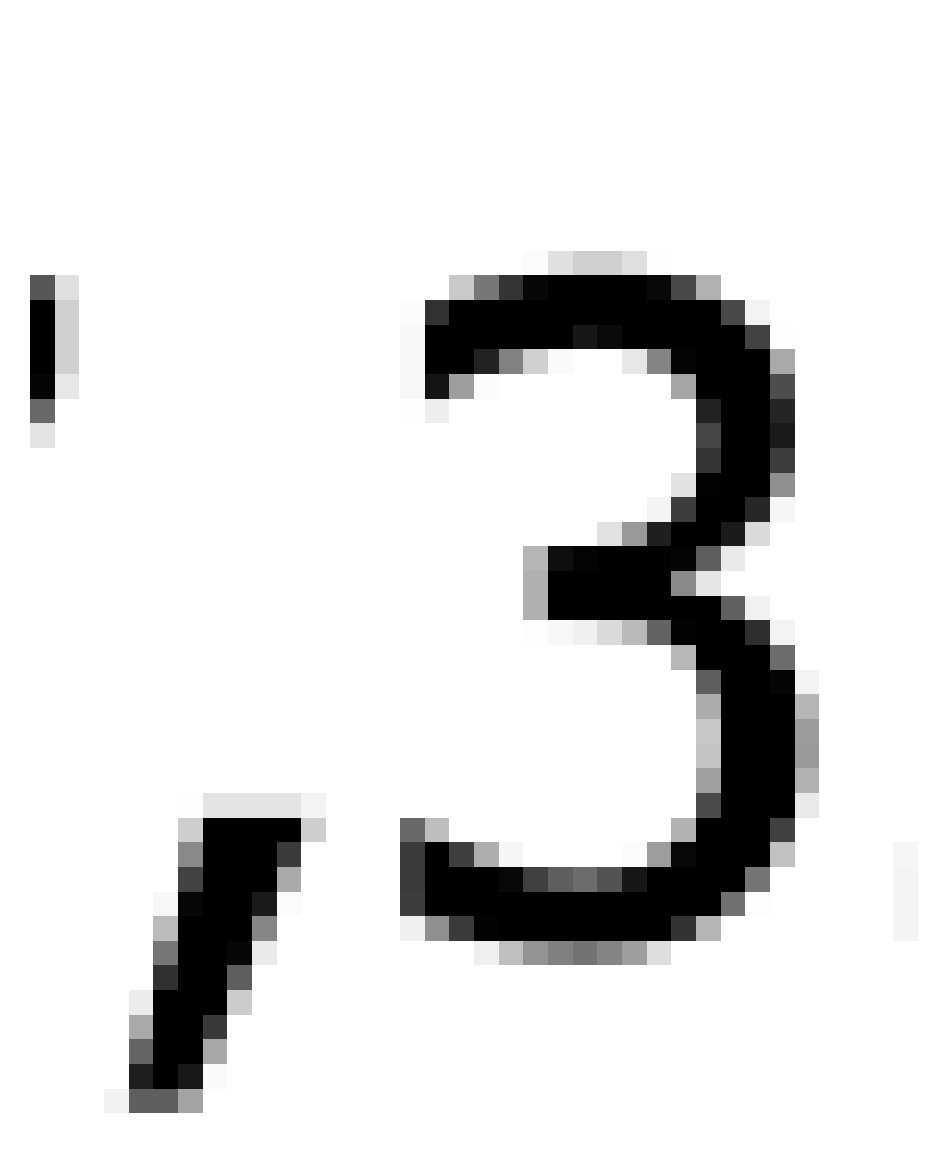

Link: 206, Text: 7,32


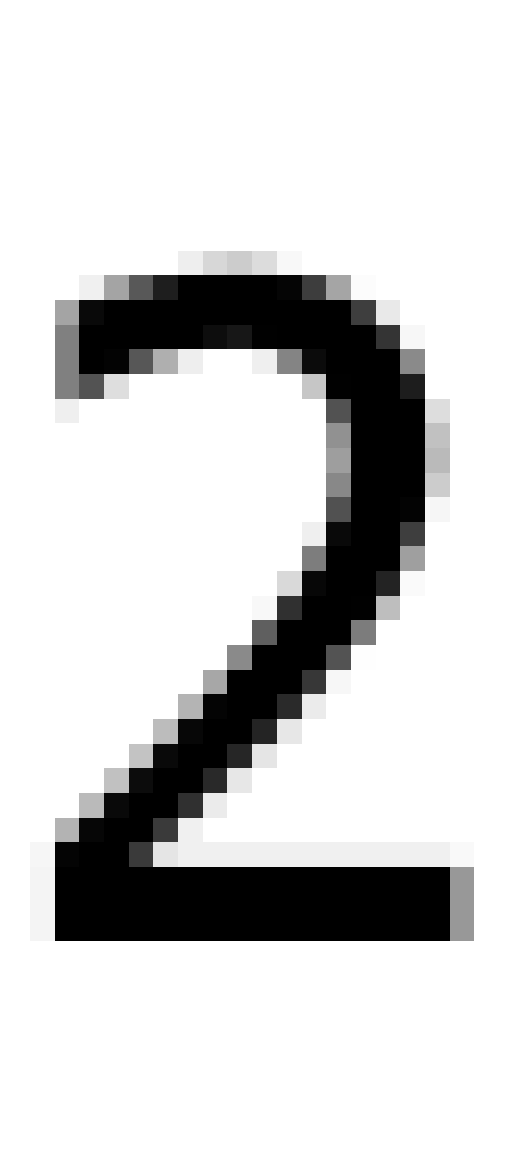

Link: 187, Text: 2


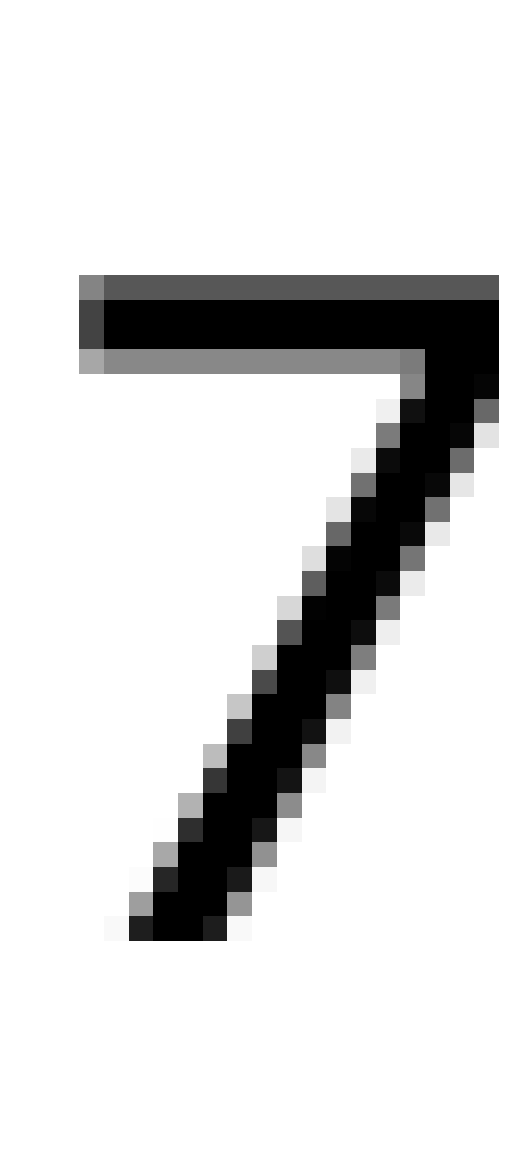

Link: 23, Text: 7


In [4]:
def return_image_from_rect(page, rect):
    """Display a pixmap from a rectangle with higher DPI for better quality."""
    DPI = 300  # increase DPI for better quality
    img = page.get_pixmap(clip=rect, dpi=DPI).pil_image()
    return img


def show_image(img):
    """Display an image."""
    import matplotlib.pyplot as plt

    plt.figure(dpi=300)
    plt.imshow(img)
    plt.axis("off")
    plt.show()


for link in xx:
    rect = link["from"]  # the link "hot area"
    # h = rect.height * 0.1  # 10% of the link rectangle's height
    # smaller = rect + (0, h, 0, -h)  # this rectangle has a that is 20% smaller but same width
    text = page.get_textbox(rect)
    show_image(return_image_from_rect(page, rect))
    print(f"Link: {link['page']}, Text: {text.strip()}")

## Create an interactive graph of links     

In [5]:
doc = pymupdf.open("pdfs/sample.pdf")  # open a document.
page = doc[22]
xx = page.get_links()  # get the contents of page 22

LINK_TYPES = {
    pymupdf.LINK_NONE: "0",
    pymupdf.LINK_GOTO: "1",
    pymupdf.LINK_URI: "2",
    pymupdf.LINK_LAUNCH: "3",
    pymupdf.LINK_NAMED: "4",
    pymupdf.LINK_GOTOR: "5",
}
# UNION type for links
import typing

LinkType = typing.Union[
    pymupdf.LINK_NONE,
    pymupdf.LINK_GOTO,
    pymupdf.LINK_URI,
    pymupdf.LINK_LAUNCH,
    pymupdf.LINK_NAMED,
    pymupdf.LINK_GOTOR,
]
# xx

for l in page.links(kinds=[pymupdf.LINK_NAMED]):
    print(l)

{'kind': 4, 'xref': 7743, 'from': Rect(653.5130004882812, 100.0670166015625, 713.2960205078125, 110.697021484375), 'page': '266', 'view': 'Fit', 'id': ''}
{'kind': 4, 'xref': 7744, 'from': Rect(713.2960205078125, 100.0670166015625, 743.18701171875, 110.697021484375), 'page': '187', 'view': 'Fit', 'id': ''}
{'kind': 4, 'xref': 7745, 'from': Rect(623.6220092773438, 100.0670166015625, 653.5130004882812, 110.697021484375), 'page': '23', 'view': 'Fit', 'id': ''}
{'kind': 4, 'xref': 7746, 'from': Rect(653.5130004882812, 122.7440185546875, 713.2960205078125, 133.3740234375), 'page': '206', 'view': 'Fit', 'id': ''}
{'kind': 4, 'xref': 7747, 'from': Rect(713.2960205078125, 122.7440185546875, 743.18701171875, 133.3740234375), 'page': '187', 'view': 'Fit', 'id': ''}
{'kind': 4, 'xref': 7748, 'from': Rect(623.6220092773438, 122.7440185546875, 653.5130004882812, 133.3740234375), 'page': '23', 'view': 'Fit', 'id': ''}
{'kind': 4, 'xref': 7749, 'from': Rect(46.46689987182617, 100.0670166015625, 65.69

# page to page Graph

<<
  /A 32288 0 R
  /BS <<
    /W 0
  >>
  /F 4
  /P 95 0 R
  /Rect [ 65.7 731.693 75.3165 742.323 ]
  /Subtype /Link
  /Type /Annot
>>
Rect: [65.7, 731.693, 75.3165, 742.323]
Converted Rect: Rect(65.7, 100.06701464843752, 75.3165, 110.69701464843752)


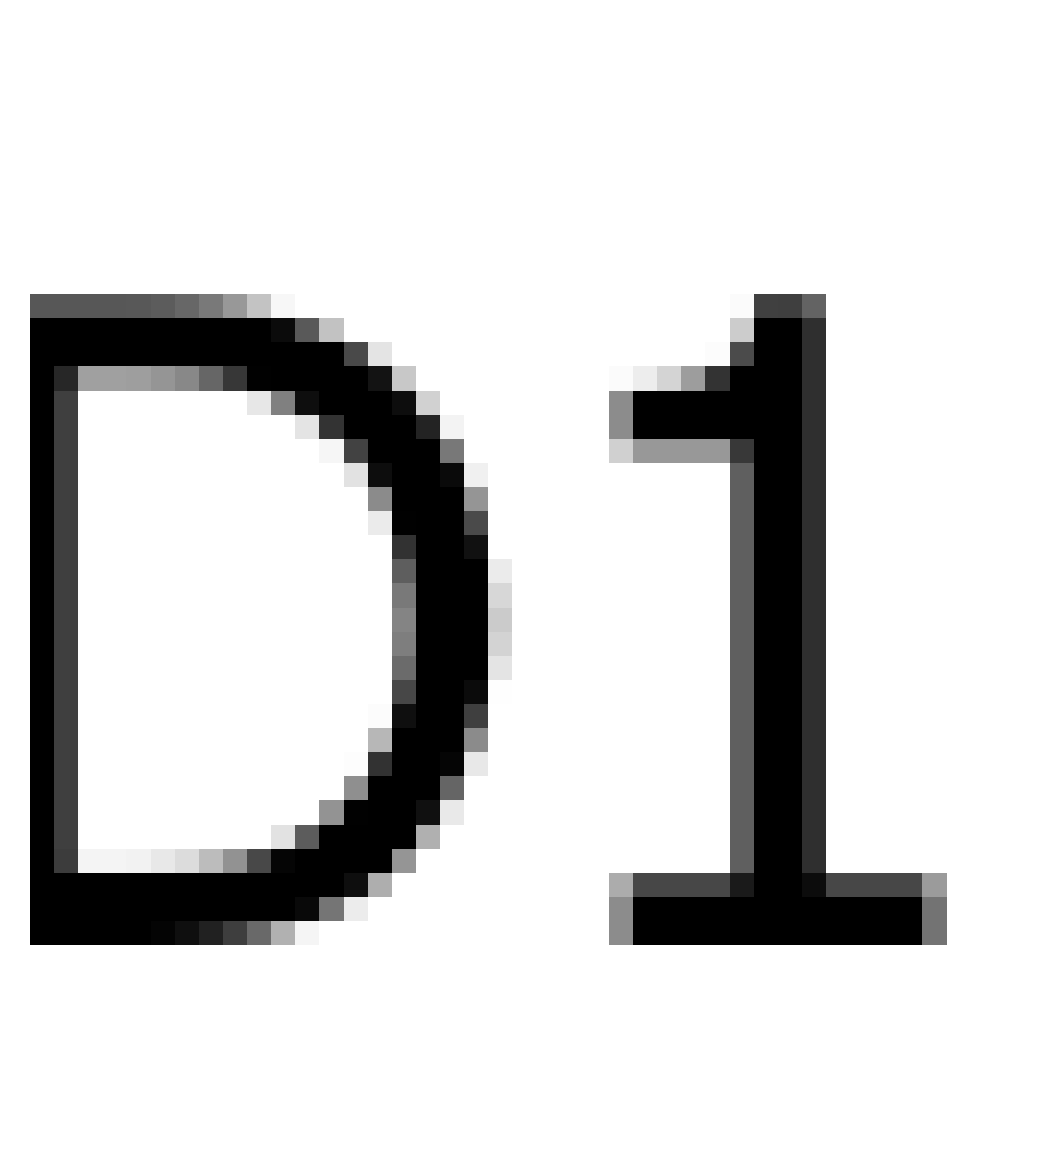

In [6]:
from pymupdf import Rect

page = doc[22]


def get_mupdf_rect(rect, page):
    x0, y0, x1, y1 = rect
    page_h = page.rect.height
    clip_top = page_h - y1
    clip_bottom = page_h - y0
    rect = Rect(x0, clip_top, x1, clip_bottom)
    print(f"Converted Rect: {rect}")
    return rect


print(doc.xref_object(7750))
rect = doc.xref_get_key(7750, "Rect")[1][1:-1].split(" ")
rect = list(map(float, rect))
print(f"Rect: {rect}")

img = return_image_from_rect(page, get_mupdf_rect(rect, page))
show_image(img)

In [7]:
# pdf get obj 32281
print(doc.xref_object(32288))
print(doc.xref_get_key(32288, "Next"))

<<
  /D [ 259 0 R /Fit ]
  /Next 57044 0 R
  /S /GoTo
  /Type /Action
>>
('xref', '57044 0 R')


<<
  /JS (highlight\(186, [222.406, 720.354, 239.528, 730.984]\);\n)
  /S /JavaScript
  /Type /Action
>>
highlight(186, [222.406, 720.354, 239.528, 730.984]);

Page height: 842.3900146484375
Page number: 186, Rect: [65.7, 731.693, 75.3165, 742.323]


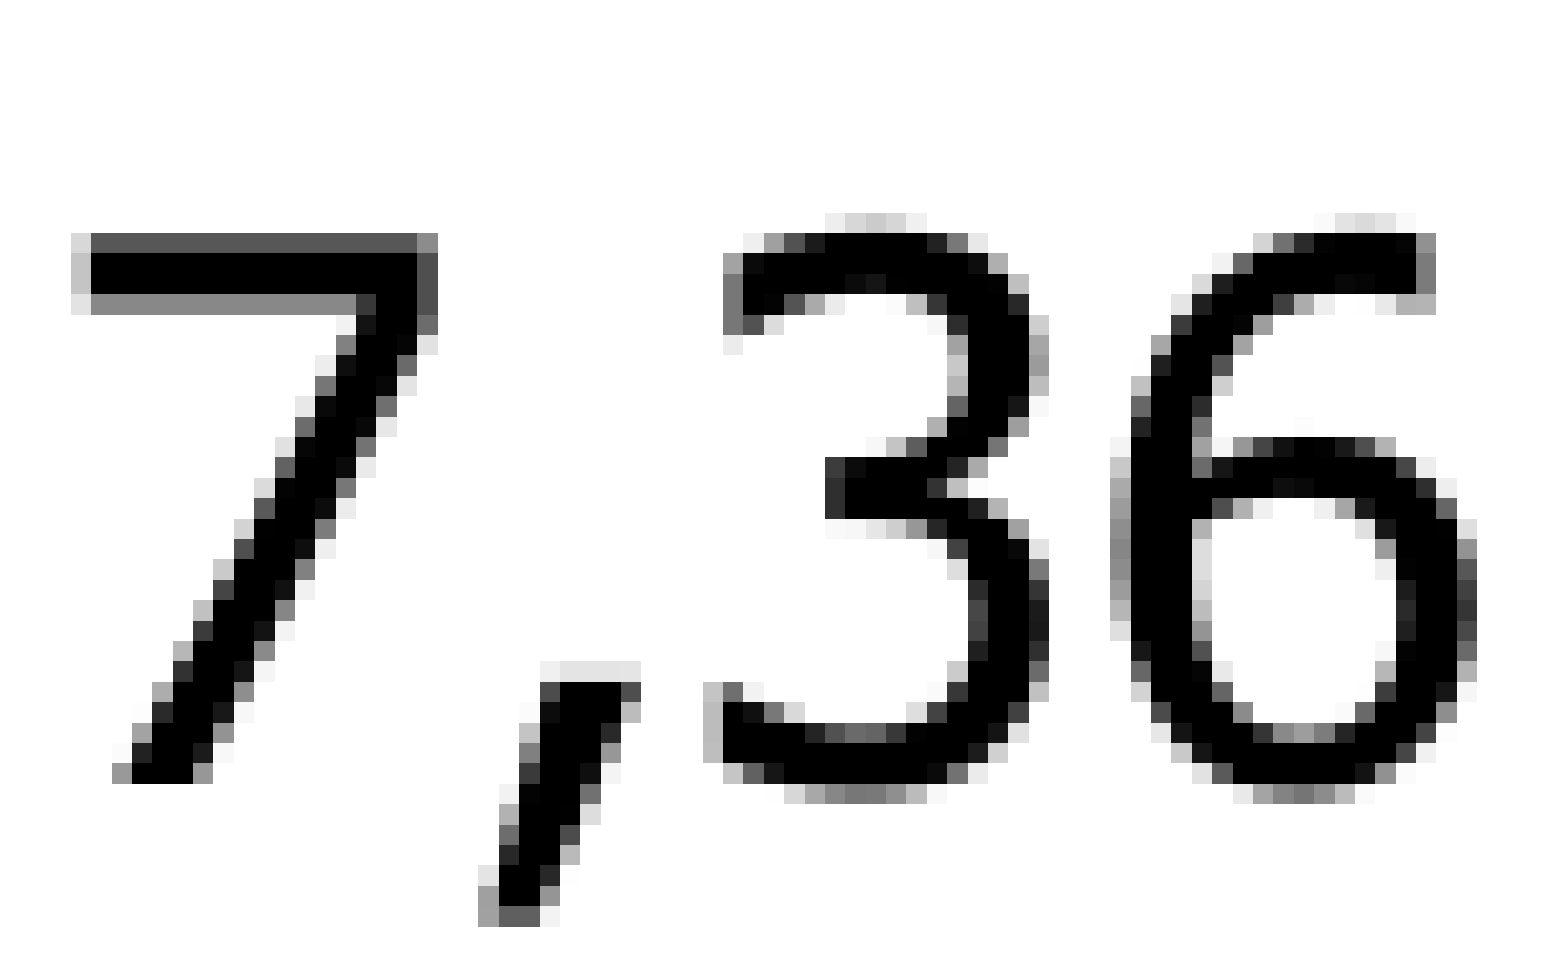

In [8]:
print(doc.xref_object(57044))
js_code = doc.xref_get_key(57044, "JS")[1]
if js_code != "null":
    print(js_code)
    # example:: highlight(205, [465.704, 585.638, 544.606, 611.575]);
    # extract the pagenum and rect dimenstions
    import re
    from pymupdf import Rect

    # extract the pagenum and rect dimensions
    match = re.search(r"highlight\((\d+), \[(.*?)\]\);", js_code)
    if match:
        pagenum = int(match.group(1))
        coords = list(map(float, match.group(2).split(",")))
        page_h = page.rect.height
        print(f"Page height: {page_h}")
        # flip the y
        # --- convert PDF coords (origin bottom-left) -> PyMuPDF clip rect (y flipped) ---
        page_h = page.rect.height
        # PDF rect is [llx, lly, urx, ury] -> y increases upward
        x0, y0, x1, y1 = coords
        clip_top = page_h - y1  # top y in PyMuPDF coordinate space
        clip_bottom = page_h - y0
        clip = Rect(x0, clip_top, x1, clip_bottom)
        print(f"Page number: {pagenum}, Rect: {rect}")
        page = doc[pagenum]  # pages are 0-indexed in PyMuPDF
        img = return_image_from_rect(page, clip)
        show_image(img)

## Page-to-page link graph (interactive)
Build a directed, weighted graph where nodes are pages and edge weight equals count of links from source to target page.

In [9]:
# Build weighted page-to-page link graph
import math
from collections import Counter
import networkx as nx
import plotly.graph_objects as go
import pymupdf


doc = pymupdf.open("pdfs/sample.pdf")

edges = Counter()  # (src, dst) -> weight
num_pages = len(doc)
for src in range(num_pages):
    for link in doc[src].links([pymupdf.LINK_GOTO, pymupdf.LINK_NAMED]):
        dst = link.get("page")
        dst = int(dst)
        if isinstance(dst, int) and 0 <= dst < num_pages:
            edges[(src, dst)] += 1

# Build DiGraph
G = nx.DiGraph()
G.add_nodes_from(range(num_pages))
for (u, v), w in edges.items():
    G.add_edge(u, v, weight=w)

# Positional layout
seed = 7
k = 1 / math.sqrt(max(G.number_of_nodes(), 1))
pos = nx.spring_layout(G, k=k, seed=seed)

# Cache degrees for visualization
in_w = dict(G.in_degree(weight="weight"))
out_w = dict(G.out_degree(weight="weight"))
total_w = {n: in_w.get(n, 0) + out_w.get(n, 0) for n in G.nodes()}

# Export for next cell
page_graph = dict(G=G, pos=pos, edges=edges, in_w=in_w, out_w=out_w, total_w=total_w)

In [ ]:
# Create interactive HTML visualization
import plotly.graph_objects as go
import plotly.offline as pyo
import numpy as np

# Unpack the graph data
G = page_graph["G"]
pos = page_graph["pos"]
edges = page_graph["edges"]
in_w = page_graph["in_w"]
out_w = page_graph["out_w"]
total_w = page_graph["total_w"]

# Create edge traces
edge_x = []
edge_y = []
edge_weights = []

for (u, v), weight in edges.items():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_weights.append(weight)

# Edge trace
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color="#888"),
    hoverinfo="none",
    mode="lines",
    name="Links",
)

# Node coordinates and info
node_x = []
node_y = []
node_text = []
node_colors = []
node_sizes = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    # Node info for hover
    in_degree = in_w.get(node, 0)
    out_degree = out_w.get(node, 0)
    total_degree = total_w.get(node, 0)

    node_text.append(
        f"Page {node}<br>"
        f"Incoming links: {in_degree}<br>"
        f"Outgoing links: {out_degree}<br>"
        f"Total weight: {total_degree}"
    )

    # Color based on total degree (log scale for better visualization)
    node_colors.append(np.log1p(total_degree))

    # Size based on total degree (with min/max bounds)
    size = max(5, min(50, 5 + total_degree * 2))
    node_sizes.append(size)

# Node trace
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode="markers",
    hoverinfo="text",
    text=node_text,
    name="Pages",
    marker=dict(
        showscale=True,
        colorscale="Viridis",
        reversescale=True,
        color=node_colors,
        size=node_sizes,
        colorbar=dict(
            thickness=15, len=0.7, xanchor="left", title="Link Activity<br>(log scale)"
        ),
        line=dict(width=2, color="white"),
    ),
)

# Create the figure
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title=dict(
            text="PDF Page-to-Page Link Graph<br>"
            f"<sub>{len(G.nodes())} pages, {len(edges)} unique connections</sub>",
            x=0.5,
            font=dict(size=20),
        ),
        showlegend=True,
        hovermode="closest",
        margin=dict(b=20, l=5, r=5, t=80),
        annotations=[
            dict(
                text="Hover over nodes for details. Use mouse to pan/zoom.",
                showarrow=False,
                xref="paper",
                yref="paper",
                x=0.005,
                y=-0.002,
                xanchor="left",
                yanchor="bottom",
                font=dict(color="gray", size=12),
            )
        ],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor="white",
        paper_bgcolor="white",
        font=dict(family="Arial, sans-serif", size=12),
        # Enable zooming and panning for large graphs
        dragmode="pan",
    ),
)

# Configure for better performance with large graphs
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list(
                [
                    dict(args=[{"dragmode": "zoom"}], label="Zoom", method="relayout"),
                    dict(args=[{"dragmode": "pan"}], label="Pan", method="relayout"),
                    dict(
                        args=[{"dragmode": "select"}], label="Select", method="relayout"
                    ),
                ]
            ),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.01,
            xanchor="left",
            y=1.02,
            yanchor="top",
        ),
    ]
)

# Show the plot
fig.show()

# Save to HTML file
html_file = "page_link_graph.html"
pyo.plot(fig, filename=html_file, auto_open=False)
print(f"Graph saved to {html_file}")
print(f"Open this file in your browser to view the interactive graph")

# Display some statistics
print(f"\nGraph Statistics:")
print(f"Total pages: {len(G.nodes())}")
print(f"Total unique connections: {len(edges)}")
print(f"Total link instances: {sum(edges.values())}")
print(
    f"Most connected page: {max(total_w, key=total_w.get)} (weight: {max(total_w.values())})"
)
print(f"Average connections per page: {sum(total_w.values()) / len(G.nodes()):.2f}")

Graph saved to page_link_graph.html
Open this file in your browser to view the interactive graph

Graph Statistics:
Total pages: 328
Total unique connections: 2182
Total link instances: 25914
Most connected page: 215 (weight: 1184)
Average connections per page: 158.01
